In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

import scipy
import scipy.stats as stats
from scipy.special import beta as B, comb
scipy.__version__

'1.4.1'

In [2]:
n_trials = [1, 3, 4, 8, 15, 50, 500, 750, 1000, 2000]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

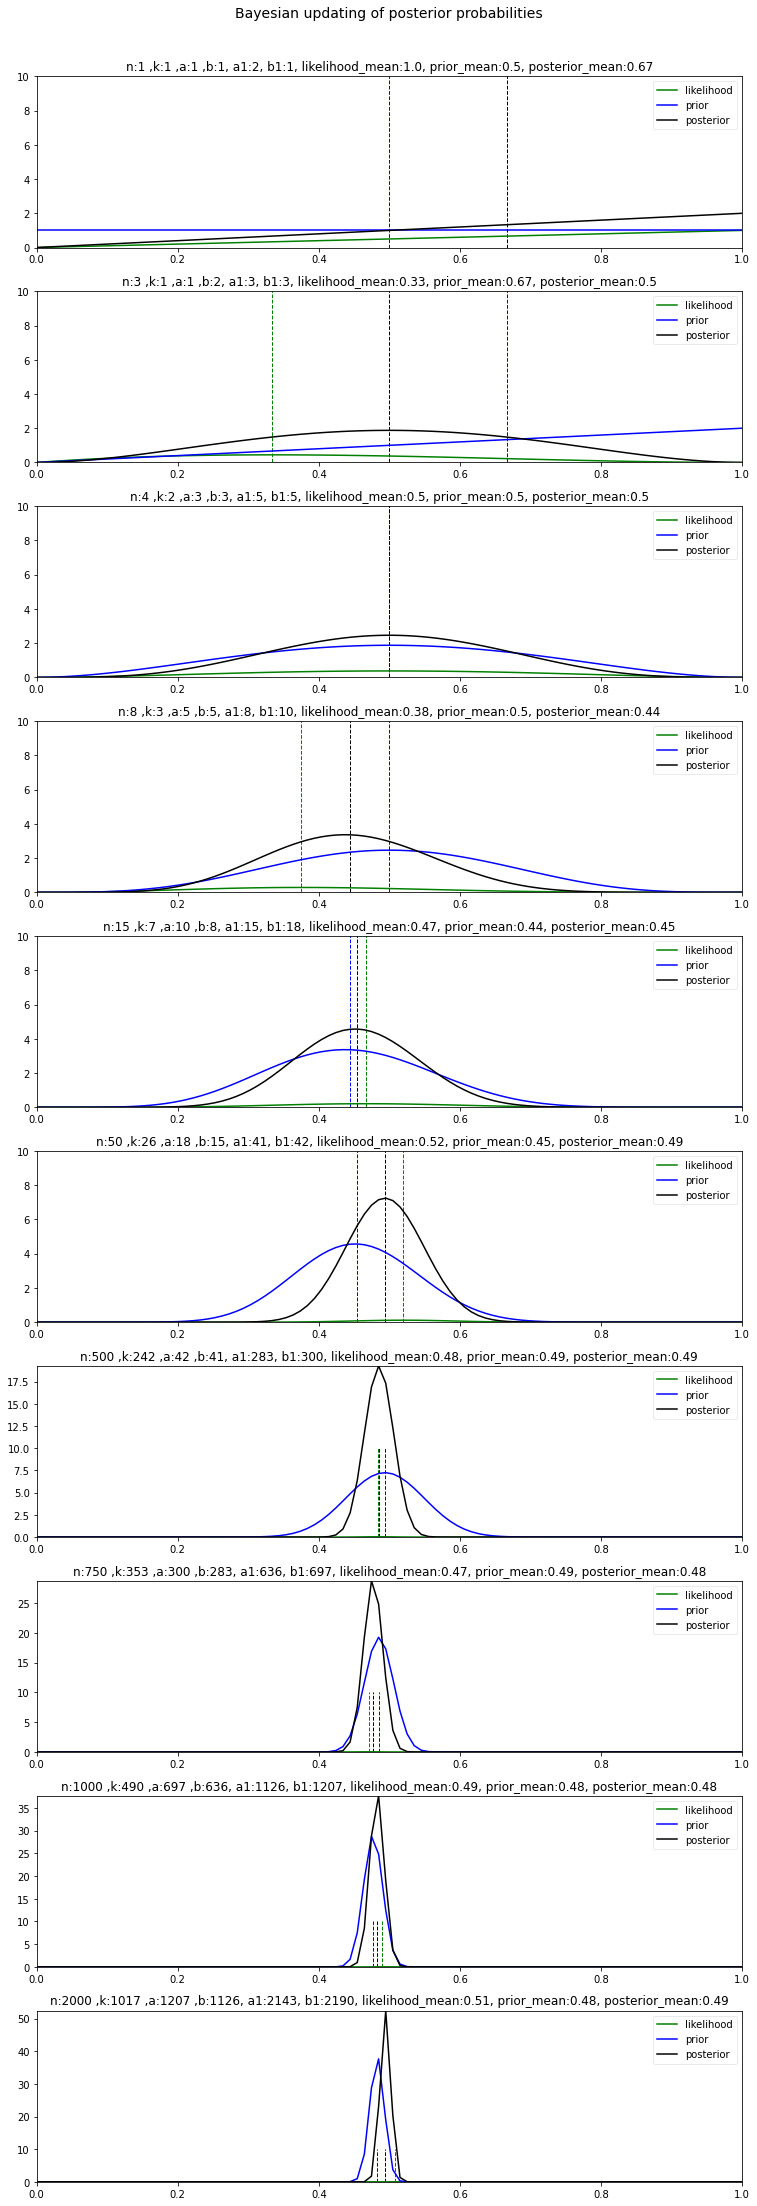

In [3]:
figsize(11, 30)
betabinom_pmf = lambda k, n, a, b, a1, b1: comb(n,k) * B(a1, b1) / B(a,b)
a = 1
b = 1
for i, n in enumerate(n_trials):
    k = data[0:n].sum()
    prior = stats.beta.pdf(x, a=a, b=b)
    a1 = a+k
    b1 = n+b-k
    posterior = stats.beta.pdf(x, a=a1, b=b1)
    likelihood = stats.binom.pmf(k=k, n=n, p=x)
    sx = plt.subplot(len(n_trials), 1, i+1)

    plt.plot(x, likelihood, label="likelihood", color="green")
    plt.vlines(k/n, 0, 10, color="green", linestyles="--", lw=1)
    plt.plot(x, prior, label="prior", color="blue")
    plt.vlines(a/(a+b), 0, 10, color="blue", linestyles="--", lw=1)
    plt.plot(x, posterior, label="posterior", color="black")
    plt.vlines(a1/(a1+b1), 0, 10, color="black", linestyles="--", lw=1)
    
    s = "n:" + str(n) + " ,k:" + str(k) + \
    " ,a:" + str(b) + " ,b:" + str(a) + ", a1:" + str(a1) + ", b1:" + str(b1) + \
    ", likelihood_mean:" + str(round(k/n ,2)) + \
    ", prior_mean:" + str(round(a/(a+b) ,2)) + \
    ", posterior_mean:" + str(round(a1/(a1+b1) ,2))
    plt.title(s)
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    
    #plt.plot(np.arange(k), betabinom_pmf(np.arange(k), n, a, b, a1, b1), color="red")
    a = a1
    b = b1

plt.suptitle("Bayesian updating of posterior probabilities", y=1.02, fontsize=14)
plt.tight_layout()

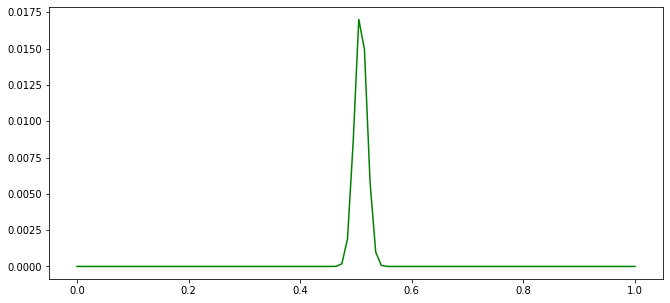

In [4]:
figsize(11, 5)
plt.plot(x, likelihood, label="likelihood", color="green");

C:\Users\smrut\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\smrut\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\smrut\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


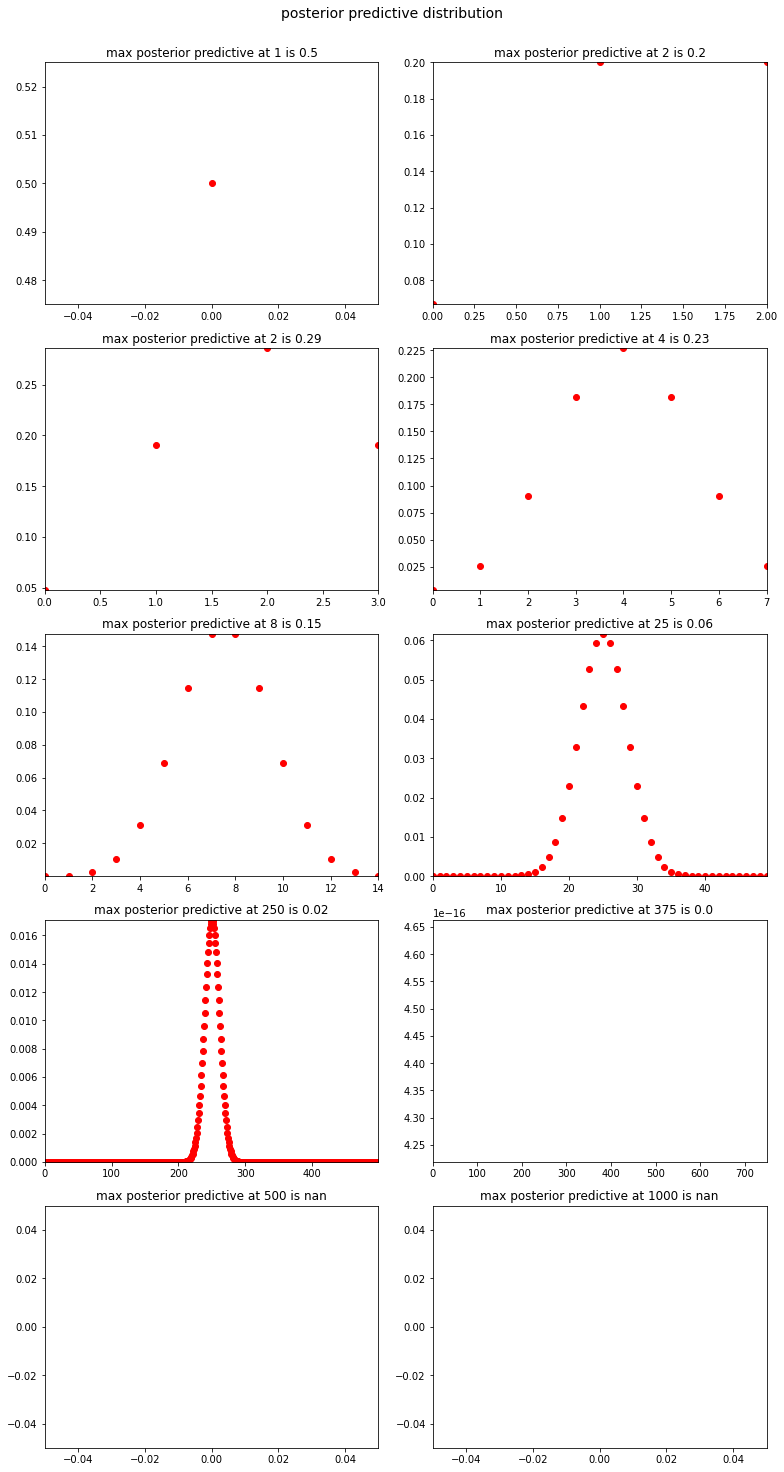

In [5]:
figsize(11, 20)
from math import ceil
betabinom_pmf = lambda k, n, a, b, a1, b1: comb(n,k) * B(a1, b1) / B(a,b)
a = 1
b = 1
for i, n in enumerate(n_trials):
    k = data[0:n].sum()
    prior = stats.beta.pdf(x, a=a, b=b)
    a1 = a+k
    b1 = n+b-k
    posterior = stats.beta.pdf(x, a=a1, b=b1)
    pp = betabinom_pmf(ceil(n/2), n, a, b, a1, b1)
    sx = plt.subplot(ceil(len(n_trials)/2), 2, i+1)
    plt.scatter(np.arange(n), betabinom_pmf(np.arange(n), n, a, b, a1, b1), color="red")
    plt.title("max posterior predictive at " + str(ceil(n/2)) + " is " + str(round(pp, 2)))
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    
    a = a1
    b = b1

plt.suptitle("posterior predictive distribution", y=1.02, fontsize=14)
plt.tight_layout()